# Deep Learning - Examen Final

Importamos las librerias que se van a utilizar

In [5]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

np.random.seed(0)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Importamos las dataset

In [6]:
dataset_1 = pd.read_csv('dataset_1.csv')
dataset_2 = pd.read_csv('dataset_2.csv')

# 1)

In [9]:
dataset_1.head()

,# X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [10]:
X = np.array(dataset_1['# X'])
Y = np.array(dataset_1['Y'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 777)

In [11]:
learning_rate = 0.000001 
n_epochs = 700
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Inicializamos los pesos y el bias
w1, w2, b = np.random.uniform(0, 1, 3)

for epoch in range(n_epochs):

  y_hat_train = []
  y_hat_test = []

  # Definimos las variables de entrenamiento
  x = X_train
  y = y_train
  
  for i in range(len(x)):

      # Forward  
      y_h = w1 * x[i]**3 + w2 * x[i]**2 + w1 * x[i] + b

      # Back
      w1 = w1 + learning_rate * (y[i] - y_h) * (x[i]**3 + x[i])
      w2 = w2 + learning_rate * (y[i] - y_h) * x[i]**2
      b = b + learning_rate * (y[i] - y_h)
    

  # Calculamos el y_hat de entrenamiento
  y_hat_train = w1 * x**3 + w2 * x**2 + w1 * x + b

  # Calculamos loss y accuracy para el y_hat de entrenamiento
  error_cuadratico_medio = np.sum(((y-y_hat_train)**2)/len(y))
  train_loss.append(error_cuadratico_medio)
  train_accuracy.append(1-error_cuadratico_medio)

  # Definimos las variables de prueba
  x = X_test
  y = y_test
        
  # Calculamos el y_hat de prueba
  y_hat_test = w1 * x**3 + w2 * x**2 + w1 * x + b

  # Calculamos loss y accuracy para y_hat de prueba
  error_cuadratico_medio = np.sum(((y-y_hat_test)**2)/len(y))
  test_loss.append(error_cuadratico_medio)
  test_accuracy.append(1-error_cuadratico_medio)
  

Gráficas:

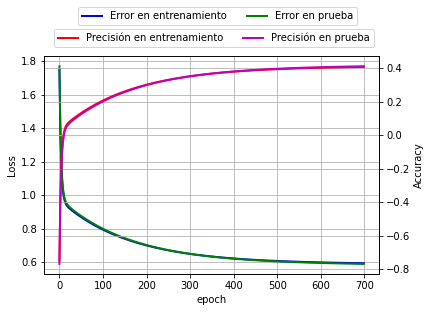

In [12]:
fig, axes = plt.subplots()

# Grafico el error en train y en test
axes.plot(np.arange(n_epochs), train_loss, linewidth = 2, label= "Error en entrenamiento", color='b')
axes.plot(np.arange(n_epochs), test_loss, linewidth = 2, label= "Error en prueba", color='g')
axes.set_xlabel('epoch')
axes.set_ylabel('Loss')
axes.legend(bbox_to_anchor =(0.95, 1.25), ncol = 2)
axes.grid()
#axes.show()

# Grafico el accuracy en train y en test
twin_axes = axes.twinx() 
twin_axes.plot(np.arange(n_epochs), train_accuracy, linewidth = 2, label= "Precisión en entrenamiento", color='r')
twin_axes.plot(np.arange(n_epochs), test_accuracy, linewidth = 2, label= "Precisión en prueba", color='m')
twin_axes.set_ylabel('Accuracy')
twin_axes.legend(bbox_to_anchor =(1, 1.15), ncol = 2)
twin_axes.grid()
plt.show()

Al comparar los resultados obtenidos, tanto de pérdidas como de precisión, en entrenamiento y en pruebas, se puede concluir que no exite overfitting.

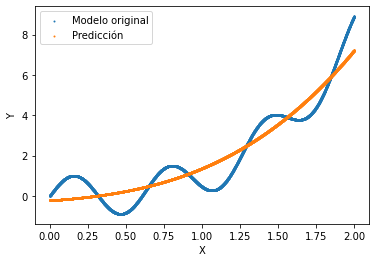

In [16]:
# Calculamos las predicciones
prediccion = w1 * X**3 + w2 * X**2 + w1 * X + b

# Graficamos los valores reales y comparamos con el modelo obtenido
plt.scatter(X, Y, label='Modelo original', s=1)
plt.scatter(X, prediccion, label='Predicción', s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Al comparar el modelo obtenido con el original, podemos darnos cuenta que tenemos un underfitting.

# 2)

# 3)

In [17]:
dataset_2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [19]:
dataset_2 = dataset_2.dropna()

dataset_2.Purchase[dataset_2.Purchase<9000] = 0
dataset_2.Purchase[dataset_2.Purchase>=9000] = 1

dataset_2.Stay_In_Current_City_Years[dataset_2.Stay_In_Current_City_Years=='4+']=5
dataset_2['Stay_In_Current_City_Years'] = dataset_2['Stay_In_Current_City_Years'].astype(int)

dataset_2.head()


/var/folders/6n/sbw9wnvd5qb998th95671fsh0000gn/T/ipykernel_731/804912701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2.Purchase[dataset_2.Purchase>=9000] = 1


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,1
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,1
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,1
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,0
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,1


## a) Modelo sin embeddings

In [20]:
# Aplicamos one hot encoder a los datos
encoder = OneHotEncoder(handle_unknown = 'ignore')
X = encoder.fit_transform(dataset_2[['Gender',	'Age',	'Occupation',	'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status', 'Product_Category_1',	'Product_Category_2',	'Product_Category_3']]).toarray()
X = pd.DataFrame(X, columns = np.concatenate((encoder.get_feature_names(['Gender',	'Age',	'Occupation',	'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status', 'Product_Category_1',	'Product_Category_2',	'Product_Category_3'])), axis = None))

/Users/andavaro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
X.shape

(166821, 81)

In [22]:
class Data(Dataset):
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]    
        
    def __len__(self):
        return self.X.shape[0]

In [23]:
class Net(nn.Module):

    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(in_features = 81, out_features = 200, bias = True)
        self.linear2 = nn.Linear(in_features = 200, out_features = 100, bias = True)
        self.linear3 = nn.Linear(in_features = 100, out_features = 1, bias = True)
   

    def forward(self, x):

        x = nn.functional.relu(self.linear1(x)) 
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.sigmoid(self.linear3(x))
        return x

In [24]:
X = np.array(X)
y = np.array(dataset_2['Purchase'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 777)

X_train = X_train.reshape(-1, 81)
X_test = X_test.reshape(-1, 81)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_loader = DataLoader(Data(X_train, y_train), batch_size = 50, shuffle = True)
test_loader = DataLoader(Data(X_test, y_test), batch_size = 50, shuffle = True)
        
net = Net()

loss_function = nn.BCEWithLogitsLoss(reduction = "sum")

learning_rate = 0.001
n_epochs = 100
optimizer = torch.optim.Adam(net.parameters(), learning_rate = learning_rate)

net.to(device)

train_loss = []
test_loss = []
test_accuracy = []

for epoch in range(n_epochs):
        
    net.train(True)

    train_epoch_loss = 0
    
    for i, data in enumerate(train_loader):
        
        X_batch, y_batch = data
        X_batch, y_batch = X_batch.to(device).float(), y_batch.to(device).float()
        
        optimizer.zero_grad()
        net_output = net(X_batch)
        y_batch = y_batch.reshape(-1, 1)
        
        loss = loss_function(net_output, y_batch)
        loss.backward()
        
        optimizer.step()

        train_epoch_loss = train_epoch_loss + loss.item()

    train_loss.append(train_epoch_loss / len(Data(X_train, y_train)))
        
    net.train(False)

    test_epoch_loss = 0
    acc = []

    for i, data in enumerate(test_loader):

        X_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()

        optimizer.zero_grad()
        net_output = net(X_batch)
        y_batch = y_batch.reshape(-1, 1)

        loss = loss_function(net_output, y_batch)

        test_epoch_loss = test_epoch_loss + loss.item()
        
        ACC = (y_batch == net_output).detach().cpu().numpy()
        acc = np.concatenate((acc, ACC), axis = None)
        
    accuracy = np.mean(acc)  
    test_accuracy.append(accuracy)      

    test_loss.append(test_epoch_loss / len(Data(X_test, y_test)))

/Users/andavaro/Library/Python/3.8/lib/python/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


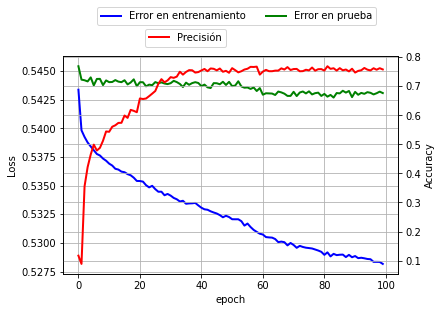

In [25]:
fig, axes = plt.subplots()

# Grafico el error en train y en test
axes.plot(np.arange(n_epochs), train_loss, linewidth = 2, label= "Error en entrenamiento", color='b')
axes.plot(np.arange(n_epochs), test_loss, linewidth = 2, label= "Error en prueba", color='g')
axes.set_xlabel('epoch')
axes.set_ylabel('Loss')
axes.legend(bbox_to_anchor =(0.95, 1.25), ncol = 2)
axes.grid()
#axes.show()

# Grafico la precisión en test
twin_axes = axes.twinx() 
twin_axes.plot(np.arange(n_epochs), test_accuracy, linewidth = 2, label= "Precisión", color='r')
twin_axes.set_ylabel('Accuracy')
twin_axes.legend(bbox_to_anchor =(0.5, 1.15), ncol = 2)
twin_axes.grid()
plt.show()

## b) Modelo con embeddings

In [26]:
user_id_to_index = {key:value for key, value in zip(np.unique(dataset_2['User_ID']), np.arange(0, len(np.unique(dataset_2['User_ID']))))}
user_idx = np.array([user_id_to_index[i] for i in dataset_2['User_ID']])
user_idx

array([   0,    3,    4, ..., 5869, 5869, 5869])

In [27]:
product_id_to_index = {key:value for key, value in zip(np.unique(dataset_2['Product_ID']), np.arange(0, len(np.unique(dataset_2['Product_ID']))))}
product_idx = np.array([product_id_to_index[i] for i in dataset_2['Product_ID']])
product_idx

array([394, 287, 214, ..., 421, 184, 346])

In [36]:
class DataEmbeddings(Dataset):

    def __init__(self, X, user_id, product_id, y):
        super().__init__()
        self.X = X
        self.user_id = user_id
        self.product_id = product_id
        self.y = y

    def __getitem__(self, idx):
        return self.X[idx], self.user_id[idx], self.product_id[idx], self.y[idx]

    def __len__(self):
        return self.X.shape[0]

In [37]:
class NetEmbeddings(nn.Module):

    def __init__(self, num_users, num_products, d_u, d_p):
        super().__init__()
        self.embedding1 = nn.Embedding(num_embeddings = num_users, embedding_dim = d_u)
        self.embedding2 = torch.nn.Embedding(num_embeddings = num_products, embedding_dim = d_p)
        self.linear1 = torch.nn.Linear(in_features = 68 + d_u + d_p, out_features = 200, bias = True)
        self.linear2 = torch.nn.Linear(in_features = 200, out_features = 50, bias = True)
        self.linear3 = torch.nn.Linear(in_features = 50, out_features = 1, bias = True)

    def forward(self, x, user_id, product_id):
        self.user_e = self.embedding1(user_id)
        self.product_e = self.embedding2(product_id)
        self.final_input = torch.cat([x, self.user_e, self.product_e], dim = 1)  
        x = nn.functional.relu(self.linear1(self.final_input)) 
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.sigmoid(self.linear3(x))
        return x

In [47]:
# Aplicamos one hot encoder a los datos
encoder = OneHotEncoder(handle_unknown = 'ignore')

X = encoder.fit_transform(dataset_2[['Gender',	'Age',	'Occupation',	'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status', 'Product_Category_1',	'Product_Category_2',	'Product_Category_3']]).toarray()
X = pd.DataFrame(X, columns = np.concatenate((encoder.get_feature_names(['Gender',	'Age',	'Occupation',	'City_Category',	'Stay_In_Current_City_Years',	'Marital_Status', 'Product_Category_1',	'Product_Category_2',	'Product_Category_3'])), axis = None))
X = np.hstack([user_idx.reshape(-1,1), product_idx.reshape(-1,1), X])

/Users/andavaro/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
X.shape

(166821, 83)

In [48]:
X = np.array(X)
y = np.array(dataset_2['Purchase'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 777)
user_index_train = X_train[:,0]
user_index_test = X_test[:,0]
product_index_train = X_train[:,1]
product_index_test = X_test[:,1]
X_train = X_train.reshape(-1, 83)
X_test = X_test.reshape(-1, 83)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_ds = DataEmbeddings(X_train, user_index_train, product_index_train, y_train)
test_ds = DataEmbeddings(X_test, user_index_test, product_index_test, y_test)

train_dataloader = DataLoader(train_ds, batch_size = 50, shuffle = True)
test_dataloader = DataLoader(test_ds, batch_size = 50, shuffle = True)
      
user_n = int(len(np.unique(dataset_2['User_ID'])))
product_n = int(len(np.unique(dataset_2['Product_ID'])))
net = NetEmbeddings(user_n, product_n, 8, 8)

loss_function = torch.nn.BCEWithLogitsLoss(reduction = "sum")

learning_rate = 0.001
n_epochs = 100
optimizer = torch.optim.Adam(net.parameters(), learning_rate)

net.to(device)

train_loss = []
test_loss = []
test_accuracy = []

for epoch in range(n_epochs):
    
    net.train(True)

    train_epoch_loss = 0
    
    for i, data in enumerate(train_dataloader):
        
        X_batch, user_batch, product_batch, y_batch = data
        
        X_batch = X_batch.to(device).float()
        user_batch = user_batch.to(device).long()
        product_batch = product_batch.to(device).long()
        y_batch = y_batch.to(device).float()
        
        optimizer.zero_grad()
        net_output = net(X_batch, user_batch, product_batch)
        y_batch = y_batch.reshape(-1, 1)
        
        loss = loss_function(net_output, y_batch)
        loss.backward()
        
        optimizer.step()

        train_epoch_loss = train_epoch_loss + loss.item()

    train_loss.append(train_epoch_loss / len(train_ds))

    net.train(False)

    test_epoch_loss = 0
    acc = []

    for i, data in enumerate(test_dataloader):

        X_batch, user_batch, product_batch, y_batch = data
        X_batch = X_batch.to(device).float()
        user_batch = user_batch.to(device).long()
        product_batch = product_batch.to(device).long()
        y_batch = y_batch.to(device).float()

        optimizer.zero_grad()
        net_output = net(X_batch, user_batch, product_batch)
        y_batch = y_batch.reshape(-1, 1)

        loss = loss_function(net_output, y_batch)

        test_epoch_loss = test_epoch_loss + loss.item()
        
        ACC = np.mean((y_batch == net_output).detach().cpu().numpy())
        acc = np.concatenate((acc, ACC), axis = None)
        
    accuracy = np.mean(acc)  
    test_accuracy.append(accuracy)          

    test_loss.append(test_epoch_loss / len(test_ds))

/Users/andavaro/Library/Python/3.8/lib/python/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


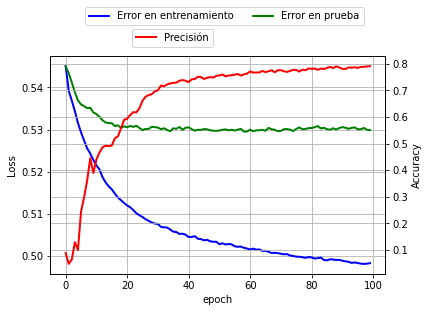

In [49]:
fig, axes = plt.subplots()

# Grafico el error en train y en test
axes.plot(np.arange(n_epochs), train_loss, linewidth = 2, label= "Error en entrenamiento", color='b')
axes.plot(np.arange(n_epochs), test_loss, linewidth = 2, label= "Error en prueba", color='g')
axes.set_xlabel('epoch')
axes.set_ylabel('Loss')
axes.legend(bbox_to_anchor =(0.95, 1.25), ncol = 2)
axes.grid()
#axes.show()

# Grafico la precisión en test
twin_axes = axes.twinx() 
twin_axes.plot(np.arange(n_epochs), test_accuracy, linewidth = 2, label= "Precisión", color='r')
twin_axes.set_ylabel('Accuracy')
twin_axes.legend(bbox_to_anchor =(0.5, 1.15), ncol = 2)
twin_axes.grid()
plt.show()

## c) Comparación de los modelos

Al observar los resultados de error en ambos modelos, podemos notar que los valores de error decrecen hasta cierto umbral tanto en training como en test; sin embargo, el decrecimiento presenta picos mucho mas notorios en el modelo sin embedings. Otra diferencia que se puede notar está en el valor de error alcanzado, siendo mas bajo en el modelo con embeddings (train<0.5, test<0.53) que en el modelo sin embeddings (train>0.5275, test>0.5425). Lo mismo ocurre con los valores de Precisión, donde el modelo con embeddings, con una precisión cercana a 0.8, sobresale respecto a la precisión de 0.75 del otro modelo.

# 4)

$y=a log(b) + bc^2$

## a) Derivadas analíticas

### Respecto a $a$

$\frac{\partial y}{\partial a}=log(b)|_{b=10}=2.3$

### Respecto a $b$

$\frac{\partial y}{\partial b}=\frac{a}{b}+c^2|_{a=2, b=10, c=0.5}=0.45$

### Respecto a $c$

$\frac{\partial y}{\partial c}=2bc|_{b=10, c=0.5}=10$

## b) Utilizando límites

### Respecto a $a$

$\frac{\partial y}{\partial a}=lim_{h \to 0}\frac{(a+h) log(b) + bc^2 - a log(b) - bc^2}{h}$

$\frac{\partial y}{\partial a}=lim_{h \to 0}\frac{(a+h-a) log(b)}{h}=lim_{h \to 0}\frac{(h) log(b)}{h}$

$\frac{\partial y}{\partial a}=lim_{h \to 0}log(b)|_{b=10}=2.3$

### Respecto a $b$

$\frac{\partial y}{\partial b}=lim_{h \to 0}\frac{a log(b+h) + (b+h)c^2 - a log(b) - bc^2}{h}$

$\frac{\partial y}{\partial b}=lim_{h \to 0}\frac{a (log(b+h)-log(b)) + (b+h-b)c^2}{h}=lim_{h \to 0}\frac{a log(\frac{b+h}{b}) + (h)c^2}{h}$

$\frac{\partial y}{\partial b}=lim_{h \to 0}\frac{a log(\frac{b+h}{b})}{h} + c^2|_{a=2, b=10, c=0.5, h=0.00000000001}=0.45$

### Respecto a $c$

$\frac{\partial y}{\partial a}=lim_{h \to 0}\frac{a log(b) + b(c+h)^2 - a log(b) - bc^2}{h}$

$\frac{\partial y}{\partial a}=lim_{h \to 0}\frac{b(c^2 +2ch +h^2 -c^2)}{h}=
lim_{h \to 0}\frac{bh(2c +h)}{h}=
lim_{h \to 0}b(2c +h)$

$\frac{\partial y}{\partial a}=2bc|_{b=10, c=0.5}=10$

## d) Utilizando Pytorch

In [50]:
a=torch.tensor(2.0, requires_grad=True)
b=torch.tensor(10.0, requires_grad=True)
c=torch.tensor(0.5, requires_grad=True)

y=(a*torch.log(b))+(b*torch.pow(c, 2))

y.backward()

print(a.grad,b.grad,c.grad)

tensor(2.3026) tensor(0.4500) tensor(10.)
